In [1]:
import numpy as np
import pandas as pd
from pymoo.problems.functional import FunctionalProblem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.algorithms.moo.age import AGEMOEA
from pymoo.algorithms.soo.nonconvex.pattern import PatternSearch
from pymoo.algorithms.soo.nonconvex.es import ES
from pymoo.algorithms.moo.unsga3 import UNSGA3
from pymoo.algorithms.soo.nonconvex.cmaes import CMAES
from pymoo.algorithms.soo.nonconvex.pattern import PatternSearch


from pymoo.termination import get_termination
from pymoo.optimize import minimize

from genetic_research import Genetic_obj

In [2]:
def retrieve_data():
    path = ""

    X_train = pd.read_csv(path + "X_train.csv", index_col=0, sep=",")
    X_train.columns.name = "date"

    Y_train = pd.read_csv(path + "Y_train.csv", index_col=0, sep=",")
    Y_train.columns.name = "date"

    X_train_reshape = pd.concat(
        [X_train.T.shift(i + 1).stack(dropna=False) for i in range(250)], 1
    ).dropna()
    X_train_reshape.columns = pd.Index(range(1, 251), name="timeLag")

    return np.ascontiguousarray(X_train_reshape.to_numpy(), dtype=np.float32), np.ascontiguousarray(Y_train.to_numpy(), dtype=np.float32)

In [3]:
x0 = np.load("x0.npy")
instance = Genetic_obj(*retrieve_data())
instance.objectiv_function(x0)

/var/folders/m8/sb3p17zj07s4h28sd6njtsbw0000gn/T/ipykernel_15298/2009156589.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  X_train_reshape = pd.concat(


TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1m[1m[1mFailed in nopython mode pipeline (step: nopython frontend)
[1m[1mCannot resolve setattr: (instance.jitclass.Genetic_obj#12423dfa0<>).X_train_reshape = array(float64, 2d, F)
[1m
File "genetic_research.py", line 14:[0m
[1m    def __init__(self, X_train_reshape: np.array, Y_train: np.array):
[1m        self.X_train_reshape = X_train_reshape
[0m        [1m^[0m[0m
[0m
[0m[1mDuring: typing of set attribute 'X_train_reshape' at /Users/arnaudpetit/Documents/Programmation/3A/hedge_fund/genetic_research.py (14)[0m
[1m
File "genetic_research.py", line 14:[0m
[1m    def __init__(self, X_train_reshape: np.array, Y_train: np.array):
[1m        self.X_train_reshape = X_train_reshape
[0m        [1m^[0m[0m

[0m[1mDuring: resolving callee type: jitclass.Genetic_obj#12423dfa0<>[0m
[0m[1mDuring: typing of call at <string> (3)
[0m
[0m[1mDuring: resolving callee type: jitclass.Genetic_obj#12423dfa0<>[0m
[0m[1mDuring: typing of call at <string> (3)
[0m
[1m
File "<string>", line 3:[0m
[1m<source missing, REPL/exec in use?>[0m


In [69]:
x0 = res.X
np.save("x0", res.X)

In [75]:
_, Y_train, X_train_reshape = retrieve_data()
instance = Genetic_obj(X_train_reshape, Y_train, Y_train.T.stack().to_numpy())

objs = [
    lambda x: -1*instance.objectiv_function(x),
]

constr_ieq = []

n_var = 250 * 10

problem = FunctionalProblem(
    n_var,
    objs,
    xl=np.ones(2500) * -3,
    xu=np.ones(2500) * 3,
)

algorithm = PatternSearch(x0=x0)

termination = get_termination("n_gen", 100)

/Users/arnaudpetit/Documents/Programmation/3A/hedge_fund/genetic_research.py:63: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  X_train_reshape = pd.concat(


In [76]:
res = minimize(
    problem, algorithm, seed=1, verbose=True
)
print(f"Best solution found: \nX = {res.X}\nF = {res.F}\nCV= {res.CV}")

n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |        1 | -1.439220E-01 | -1.439220E-01
     2 |     4440 | -1.464726E-01 | -1.490233E-01


KeyboardInterrupt: 

In [65]:
np.save("x_genetic_", res.X)

In [64]:
def parametersTransform(A, beta, D=250, F=10):
    
    if A.shape != (D, F):
        print('A has not the good shape')
        return
    
    if beta.shape[0] != F:
        print('beta has not the good shape')
        return        
    
    output = np.hstack( (np.hstack([A.T, beta.reshape((F, 1))])).T )
    
    return output


A_raw = res.X.reshape([250, 10])
A, _ = np.linalg.qr(A_raw)
beta = instance.fitBeta(A)
# from output to csv file...
output = parametersTransform(A, beta)
pd.DataFrame(output).to_csv("" + 'ArnaudPetitsubmissionExample.csv')

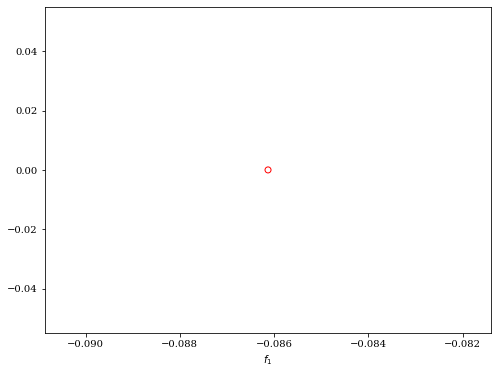

In [37]:
from pymoo.visualization.scatter import Scatter
plot = Scatter()
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
plot.add(res.F, facecolor="none", edgecolor="red")
plot.show()

In [24]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(7, 5))
plt.scatter(F, s=30, facecolors='none', edgecolors='blue')
plt.title("Objective Space")
plt.show()

TypeError: scatter() missing 1 required positional argument: 'y'

<Figure size 504x360 with 0 Axes>